Saving Housing.csv to Housing (7).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545

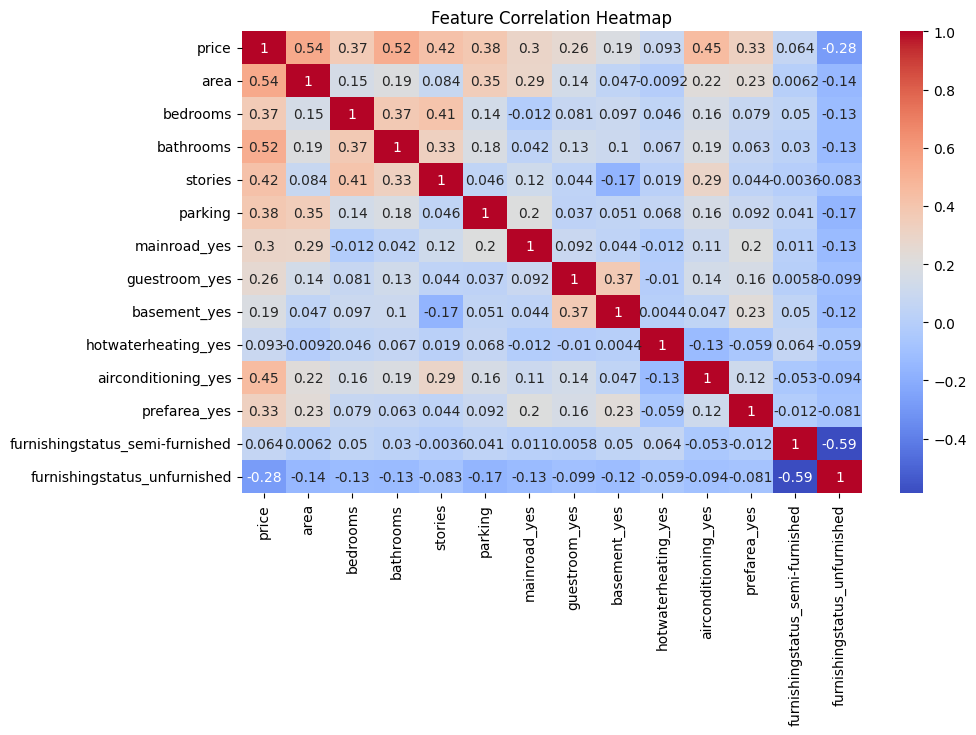

R2 Score: 0.6529242642153177
RMSE: 1324506.96009144


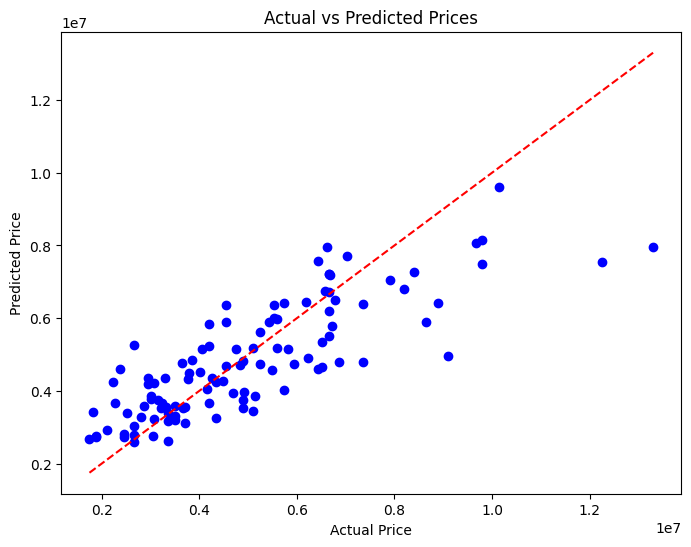

In [11]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Upload the file (or use path if in your Google Drive)
from google.colab import files
uploaded = files.upload()

# Load the CSV into a DataFrame
df = pd.read_csv('Housing.csv')
df.head()
# Step 2: Data Preprocessing
print(df.info())
print(df.describe())

# Handle categorical variables if present
df = pd.get_dummies(df, drop_first=True)

# Check for missing values
print(df.isnull().sum())

# Optional: Fill or drop missing values
# df = df.dropna()
# Step 3: EDA
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Pairplot (Optional for small datasets)
# sns.pairplot(df)
# Step 4: Feature Engineering
X = df.drop('price', axis=1)  # Independent features
y = df['price']               # Target variable

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Step 5: Model Selection
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
# Step 6: Model Evaluation
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# Step 7: Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()
